# knn 
it is supeervissed  algorithm . this  is used  for both types. it is non perametric , lazy learning algorithm ,

In [1]:
# example of knn classifier on  iris data using sns
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# load the data set 
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# split the data into  x and y .
x=df.drop('species',axis=1) 
y=df['species']

In [5]:
# load and fit the knn classifier  on the data 
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
#  predict the species for  new  set of measurements
new_measurement=np.array([[5.1,3.5,1.4,0.2]])
knn.predict(new_measurement)

c:\Users\Public\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [6]:
# train test split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'true')

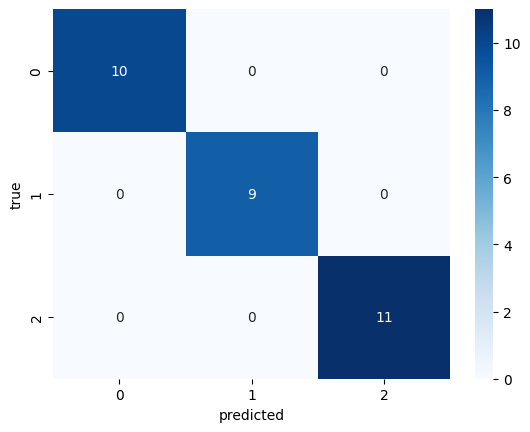

In [8]:
# evaluate the model by metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
# plot the confusion_matrix 
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('true')


now we see the reggression problem on tips data_set using KNN

In [9]:
# load the  dataset
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
x=tips.drop('tip',axis=1)
y=tips['tip']

In [11]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
# encode the categorical column using for loop and le 
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
for col in x.columns:
  if x[col].dtype=='object' or x[col].dtype=='category':
    x[col]=le.fit_transform(x[col])     


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2,random_state=42)
knn=KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)

In [14]:
# fit the data on training data 
knn.fit(x_train,y_train)
# predict the data by x_test 
y_pred =knn.predict(x_test)
# evaluate the model 
from sklearn.metrics import r2_score,mean_squared_error
print(f"mean_squared_error:{mean_squared_error(y_test,y_pred)}") 
print(f"r2_score:{r2_score(y_test,y_pred)}")
print(f"RMSE:{np.sqrt(y_test,y_pred)}")


mean_squared_error:0.8382265306122448
r2_score:0.3294034029001649
RMSE:24     1.783255
6      1.414214
153    1.414214
211    2.271563
198    1.414214
176    1.414214
192    1.600000
124    1.587451
9      1.797220
101    1.732051
45     1.732051
233    1.212436
117    1.224745
177    1.414214
82     1.352775
146    1.166190
200    2.000000
15     1.979899
66     1.571623
142    2.236068
33     1.565248
19     1.830301
109    2.000000
30     1.204159
186    1.870829
120    1.519868
10     1.307670
73     2.236068
159    1.414214
156    2.236068
112    2.000000
218    1.200000
25     1.529706
60     1.791647
18     1.870829
119    1.708801
97     1.224745
197    2.236068
139    1.658312
241    1.414214
75     1.118034
127    1.414214
113    1.596872
16     1.292285
196    1.414214
67     1.000000
168    1.268858
38     1.519868
195    1.200000
Name: tip, dtype: float64


In [15]:
x_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [18]:
# predict a specific  value
knn.predict([[18,1,0,1,0,2]])  

c:\Users\Public\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([3.172])